In [136]:
import pandas as pd
import numpy as np

In [137]:
banking = pd.read_csv('Data/banking_dirty.csv', index_col=0)
banking

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [138]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
cust_id             100 non-null object
birth_date          100 non-null object
Age                 100 non-null int64
acct_amount         100 non-null float64
inv_amount          100 non-null int64
fund_A              100 non-null float64
fund_B              100 non-null float64
fund_C              100 non-null float64
fund_D              100 non-null float64
account_opened      100 non-null object
last_transaction    100 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 9.4+ KB


In [139]:
banking.Age.describe()

count    100.000000
mean      43.170000
std       10.120541
min       27.000000
25%       34.000000
50%       45.500000
75%       51.000000
max       63.000000
Name: Age, dtype: float64

In [140]:
banking[banking.Age<30].count()

cust_id             12
birth_date          12
Age                 12
acct_amount         12
inv_amount          12
fund_A              12
fund_B              12
fund_C              12
fund_D              12
account_opened      12
last_transaction    12
dtype: int64

In [141]:
banking.loc[banking.Age<30, "inv_amount"]=np.nan

In [142]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
cust_id             100 non-null object
birth_date          100 non-null object
Age                 100 non-null int64
acct_amount         100 non-null float64
inv_amount          88 non-null float64
fund_A              100 non-null float64
fund_B              100 non-null float64
fund_C              100 non-null float64
fund_D              100 non-null float64
account_opened      100 non-null object
last_transaction    100 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 9.4+ KB


### Missingno
Useful package for visualizing and understanding missing data

In [143]:
import missingno as msno
import matplotlib.pyplot as plt

cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount          12
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened       0
last_transaction     0
dtype: int64


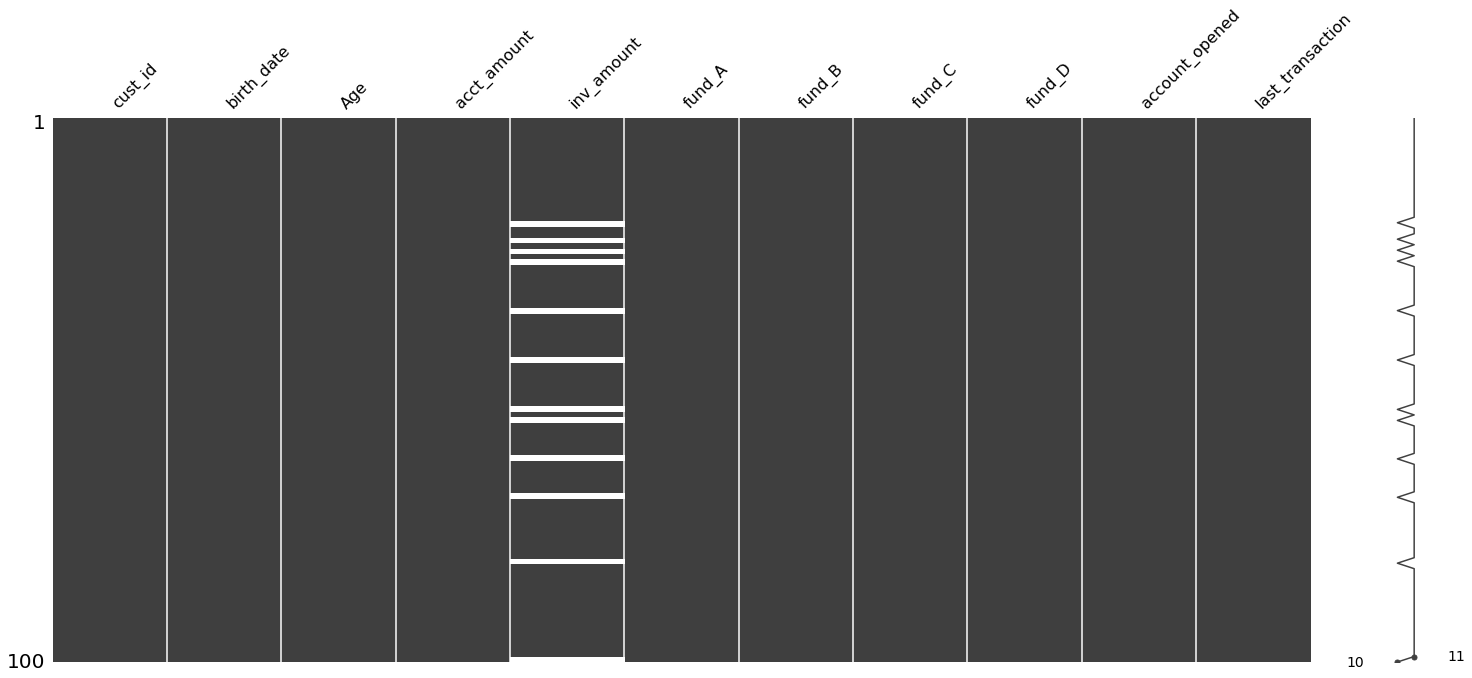

In [144]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [145]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking.inv_amount.isna()]

investors = banking[~banking.inv_amount.isna()]

In [146]:
investors

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295.0,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050.0,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567.0,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712.0,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230.0,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
94,A731C34E,1961-06-03,59,95352.02,84065.0,12061.0,15742.0,35725.0,20537.0,13-11-17,13-01-19
95,CA507BA1,1974-08-10,46,12209.84,7515.0,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,31,92838.44,49089.0,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,36,92750.87,27962.0,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19


In [147]:
missing_investors.describe()

,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,12.000000,12.000000,0.0,12.00000,12.000000,12.000000,12.000000
mean,28.000000,70941.570833,NaN,8479.50000,13352.083333,7850.050000,9005.250000
std,0.738549,26057.218820,NaN,9023.08445,8228.299675,7597.935372,9665.917189
min,27.000000,26585.870000,NaN,627.00000,1044.000000,958.000000,1004.000000
25%,27.750000,58871.305000,NaN,2652.00000,7666.750000,2186.000000,4044.750000
50%,28.000000,78064.995000,NaN,4773.00000,12676.500000,5517.800000,5447.500000
75%,28.250000,89313.407500,NaN,9788.75000,17705.750000,12225.250000,8086.750000
max,29.000000,99490.610000,NaN,27172.00000,30304.000000,26767.000000,33493.000000


In [148]:
investors.describe()

,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,88.000000,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000
mean,45.238636,3.430735e+06,47016.215909,11882.417727,11616.140114,12454.357727,11239.654205
std,8.967367,2.241591e+07,27247.956487,12813.077053,11437.153275,14692.095550,9486.920562
min,30.000000,1.220984e+04,3214.000000,41.000000,312.000000,67.000000,118.000000
25%,37.000000,5.921813e+04,23524.250000,2317.000000,2934.500000,2272.250000,4055.500000
50%,46.000000,8.388040e+04,47954.500000,7224.500000,7652.000000,8402.500000,9369.000000
75%,52.000000,9.509747e+04,68086.500000,16284.750000,17082.000000,15651.500000,16163.000000
max,63.000000,1.737431e+08,96614.000000,58179.000000,51281.000000,75499.000000,51708.000000


* The inv_amount is missing only for young customers, since the average maximum age in missing_investors is 30.

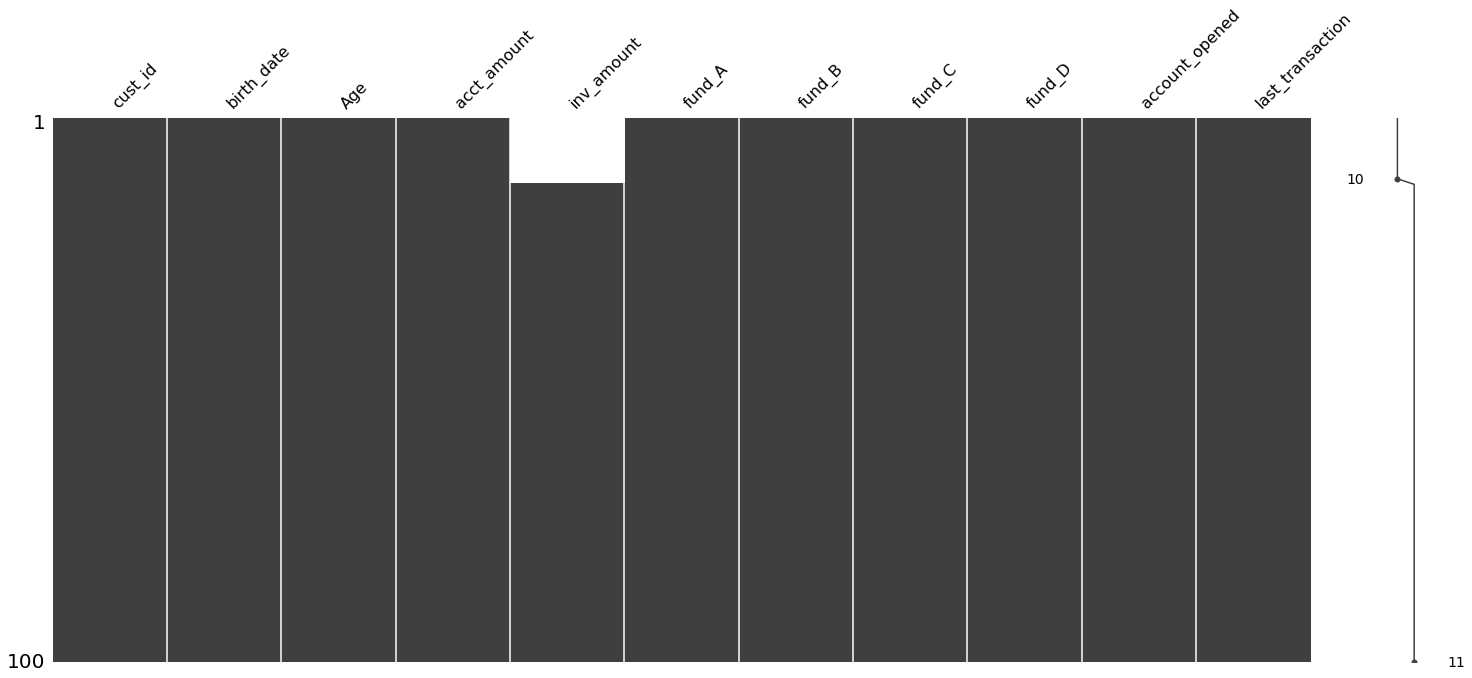

In [149]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values('Age')
msno.matrix(banking_sorted)
plt.show()

*  Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to 0 with .fillna().

### Dealing with missing data

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In [150]:
banking = pd.read_csv('Data/banking_dirty.csv', index_col=0)
banking

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [151]:
banking.loc[banking.Age<30, "cust_id"]=np.nan

In [152]:
banking.loc[banking.Age>55, "acct_amount"]=np.nan

In [153]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
cust_id             88 non-null object
birth_date          100 non-null object
Age                 100 non-null int64
acct_amount         86 non-null float64
inv_amount          100 non-null int64
fund_A              100 non-null float64
fund_B              100 non-null float64
fund_C              100 non-null float64
fund_D              100 non-null float64
account_opened      100 non-null object
last_transaction    100 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 9.4+ KB


In [154]:
banking.loc[banking.Age>55, ["acct_amount", "inv_amount"]]

,acct_amount,inv_amount
0,NaN,51295
1,NaN,15050
7,NaN,61649
20,NaN,22961
21,NaN,90440
23,NaN,30897
32,NaN,60795
37,NaN,52549
47,NaN,66796
48,NaN,87881


In [155]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid.inv_amount * 5 
acct_imp

0     256475
1      75250
2     122835
3     118560
4     466150
       ...  
94    420325
95     37575
96    245445
97    139810
98    148310
Name: inv_amount, Length: 88, dtype: int64

In [156]:
# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


In [157]:
banking_imputed.loc[banking.Age>55, ["acct_amount", "inv_amount"]]

,acct_amount,inv_amount
0,256475.0,51295
1,75250.0,15050
7,308245.0,61649
20,114805.0,22961
21,452200.0,90440
23,154485.0,30897
32,303975.0,60795
37,262745.0,52549
47,333980.0,66796
48,439405.0,87881


## Record linkage

In [158]:
restaurants = pd.read_csv('Data/restaurants_L2.csv', index_col=0)
restaurants = restaurants[:330]
restaurants

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american
...,...,...,...,...,...
325,scala's bistro,432 powell st.,san francisco,4153958555,italian
326,stars,150 redwood alley,san francisco,4158617827,american
327,stars cafe,500 van ness ave.,san francisco,4158614344,american
328,straits cafe,3300 geary blvd.,san francisco,4156681783,asian


In [159]:
restaurants['cuisine'] = ['aamerican', 'ameerican', 'ameerrican', 'america', 'american',
       'americann', 'americano', 'americen', 'americin', 'ameriican',
       'amerrican', 'amerycan', 'ammereican', 'ammericann', 'amurican',
       'asiaan', 'asian', 'asiane', 'asiann', 'asianne', 'asiat',
       'asiian', 'itali', 'italiaan', 'italian', 'italiann', 'italianne',
       'italiano', 'italien', 'italiian', 'itallian', 'merican',
       'murican']*10

In [160]:
restaurants.head()

,name,addr,city,phone,type,cuisine
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american,aamerican
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american,ameerican
2,campanile,624 s. la brea ave.,los angeles,2139381447,american,ameerrican
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american,america
4,grill on the alley,9560 dayton way,los angeles,3102760615,american,american


### The cutoff point
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. You need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's process.extract() function by finding the similarity score of the most distant typo of each category.

In [161]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants.cuisine.unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

[('asian', 100), ('asiaan', 91), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italianne', 72), ('italiano', 72), ('italian', 67), ('american', 62), ('amurican', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('aamerican', 57), ('ameerican', 57), ('americann', 57), ('americano', 57), ('ameriican', 57), ('amerrican', 57), ('ameerrican', 54), ('ammereican', 54), ('ammericann', 54), ('america', 50), ('italien', 50), ('merican', 50), ('murican', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]


In [162]:
# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

[('american', 100), ('aamerican', 94), ('ameerican', 94), ('americann', 94), ('americano', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ameerrican', 89), ('ammereican', 89), ('ammericann', 89), ('americen', 88), ('americin', 88), ('amerycan', 88), ('amurican', 88), ('murican', 80), ('asian', 62), ('asiaan', 57), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asianne', 53), ('italian', 53), ('italiaan', 50), ('italiann', 50), ('italiano', 50), ('italiian', 50), ('itallian', 50), ('italianne', 47), ('asiat', 46), ('itali', 40), ('italien', 40)]


In [163]:
# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('italian', 100), ('italiaan', 93), ('italiann', 93), ('italiano', 93), ('italiian', 93), ('itallian', 93), ('italianne', 88), ('italien', 86), ('itali', 83), ('asian', 67), ('asiaan', 62), ('asiane', 62), ('asiann', 62), ('asiian', 62), ('asianne', 57), ('american', 53), ('amurican', 53), ('aamerican', 50), ('ameerican', 50), ('americann', 50), ('americano', 50), ('ameriican', 50), ('amerrican', 50), ('asiat', 50), ('ameerrican', 47), ('ammereican', 47), ('ammericann', 47), ('america', 43), ('merican', 43), ('murican', 43), ('americen', 40), ('americin', 40), ('amerycan', 40)]


- 80 is that sweet spot where you convert all incorrect typos without remapping incorrect categories.

### Remapping categories II
In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each of tuple is as such:

`(closest match, similarity score, index of match)`

In [164]:
cat = ['asian', 'american', 'italian']

categories = pd.DataFrame(cat, columns= ['cuisine_type'])
categories

,cuisine_type
0,asian
1,american
2,italian


In [165]:
restaurants.cuisine.unique()

array(['aamerican', 'ameerican', 'ameerrican', 'america', 'american',
       'americann', 'americano', 'americen', 'americin', 'ameriican',
       'amerrican', 'amerycan', 'ammereican', 'ammericann', 'amurican',
       'asiaan', 'asian', 'asiane', 'asiann', 'asianne', 'asiat',
       'asiian', 'itali', 'italiaan', 'italian', 'italiann', 'italianne',
       'italiano', 'italien', 'italiian', 'itallian', 'merican',
       'murican'], dtype=object)

In [166]:
# For each correct cuisine_type in categories
for cuisine in categories['cuisine_type']:
  # Find matches in cuisine_type of restaurants
    matches = process.extract(cuisine, restaurants['cuisine'], 
                 limit = restaurants.shape[0])
  
    for possible_match in matches:

        if possible_match[1] >= 80:
            
      # Find matching cuisine type
        
            matching_cuisine = restaurants['cuisine'] == possible_match[0]
        
            restaurants.loc[matching_cuisine, 'cuisine'] = cuisine

# Print unique values to confirm mapping
print(restaurants['cuisine'].unique())

['american' 'asian' 'italian']


Source: Datacamp